In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
dataset = pd.read_csv('winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print("Shape of our datasets of Red-Wine:{s}".format(s = dataset.shape))
print("Column headers/names: {s}".format(s = list(dataset)))

Shape of our datasets of Red-Wine:(1599, 12)
Column headers/names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
dataset.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

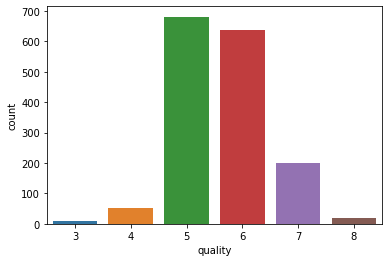

In [8]:
sns.countplot(x='quality', data=dataset)

In [9]:
dataset['alcohol'].describe()

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

In [10]:
dataset['sulphates'].describe()

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

In [11]:
dataset['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [12]:
dataset['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

In [13]:
dataset['residual sugar'].describe()

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

In [14]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [15]:
print(dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False             False        False           False      False   
1             False             False        False           False      False   
2             False             False        False           False      False   
3             False             False        False           False      False   
4             False             False        False           False      False   
...             ...               ...          ...             ...        ...   
1594          False             False        False           False      False   
1595          False             False        False           False      False   
1596          False             False        False           False      False   
1597          False             False        False           False      False   
1598          False             False        False           False      False   

      free sulfur dioxide  

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [16]:
dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

dataset_out.shape

(1179, 12)

In [17]:
dataset_out

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
correlations = dataset_out.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.113422
volatile acidity       -0.346962
citric acid             0.212133
residual sugar          0.007934
chlorides              -0.190869
free sulfur dioxide    -0.003609
total sulfur dioxide   -0.203374
density                -0.215375
pH                     -0.060288
sulphates               0.413533
alcohol                 0.492551
Name: quality, dtype: float64


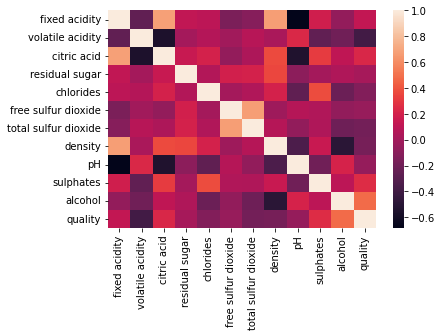

In [19]:
sns.heatmap(dataset.corr())
plt.show()

In [20]:
correlations.sort_values(ascending=False)

alcohol                 0.492551
sulphates               0.413533
citric acid             0.212133
fixed acidity           0.113422
residual sugar          0.007934
free sulfur dioxide    -0.003609
pH                     -0.060288
chlorides              -0.190869
total sulfur dioxide   -0.203374
density                -0.215375
volatile acidity       -0.346962
Name: quality, dtype: float64

In [21]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [22]:
features = get_features(0.05)
print(features)
x = dataset_out[features]
y = dataset_out['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


[Text(0.5, 0, 'Quality '),
 Text(0, 0.5, 'Alcohol '),
 Text(0.5, 1.0, 'Alcohol %  in different samples')]

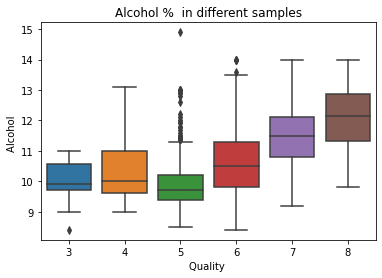

In [23]:
bx = sns.boxplot(x='quality', y='alcohol', data = dataset)
bx.set(xlabel='Quality ', ylabel='Alcohol ', title='Alcohol %  in different samples')

[Text(0.5, 0, 'Quality '),
 Text(0, 0.5, 'Sulphates '),
 Text(0.5, 1.0, 'Sulphates %  in different samples')]

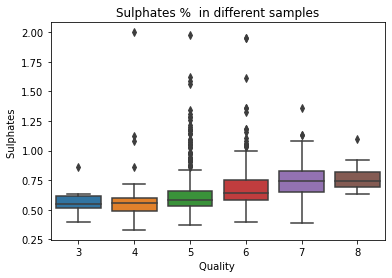

In [24]:
bx = sns.boxplot(x='quality', y='sulphates', data = dataset)
bx.set(xlabel='Quality ', ylabel='Sulphates ', title='Sulphates %  in different samples')

[Text(0.5, 0, 'Quality '),
 Text(0, 0.5, 'Citric Acid '),
 Text(0.5, 1.0, 'Citric Acid %  in different samples')]

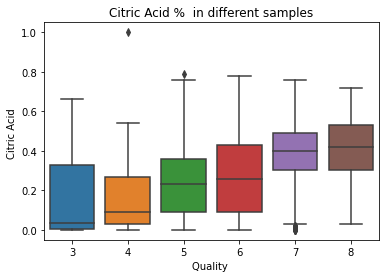

In [25]:
bx = sns.boxplot(x='quality', y='citric acid', data = dataset)
bx.set(xlabel='Quality ', ylabel='Citric Acid ', title='Citric Acid %  in different samples')

[Text(0.5, 0, 'Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity % in different samples')]

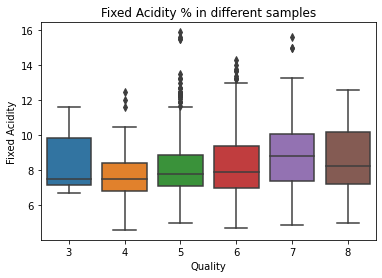

In [26]:
bx = sns.boxplot(x='quality', y='fixed acidity', data = dataset)
bx.set(xlabel='Quality', ylabel='Fixed Acidity', title='Fixed Acidity % in different samples')

In [27]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [28]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1179, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [30]:
y_test.shape

(354,)

In [31]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
regressor.intercept_

27.670573863574464

In [33]:
regressor.coef_

array([ 4.22974781e-02, -8.16827531e-01, -4.00865196e-01, -2.68428276e+00,
       -1.47339257e-03, -2.37486638e+01, -4.72842021e-01,  1.71236742e+00,
        2.47526682e-01])

In [34]:
train_pred = regressor.predict(x_train)
train_pred

array([6.14356299, 5.11710037, 5.21197237, 5.13828062, 5.97949972,
       5.66562893, 5.4777587 , 5.75868703, 5.98907913, 5.40401462,
       5.52303708, 5.21113234, 5.38046811, 5.75877598, 5.35007708,
       5.08567146, 5.70418446, 6.15016457, 4.98217495, 6.37902248,
       5.34435775, 5.58388766, 5.56975986, 6.5429133 , 5.95905468,
       5.36649122, 5.24598625, 5.58550515, 5.18791293, 5.25072061,
       5.10187748, 5.00442024, 5.69182774, 5.89415555, 5.21543362,
       5.72691046, 5.08042222, 5.16537087, 6.26665775, 5.11379649,
       4.84031354, 5.32908031, 6.59578316, 5.9574155 , 5.17612261,
       5.52155991, 5.08413929, 6.1392644 , 5.48990749, 5.93825753,
       6.23616917, 5.92388793, 5.7786765 , 6.0650639 , 5.79356716,
       5.78930793, 6.0279377 , 4.86136512, 6.06957539, 5.1960625 ,
       5.82623979, 5.21010511, 5.18855806, 5.17190517, 5.06530766,
       5.2522647 , 5.64833165, 5.66231692, 5.54553416, 5.89096209,
       5.29556643, 5.10200981, 5.02472467, 5.47288678, 5.45596

In [35]:
test_pred = regressor.predict(x_test)
test_pred

array([5.31808602, 5.58846727, 5.83179258, 5.23562426, 6.36492755,
       5.75166188, 5.61511554, 6.51307801, 6.033911  , 5.66126467,
       5.15680921, 5.48432811, 5.53204251, 5.17612261, 5.98484046,
       5.76958525, 6.09867422, 5.24902132, 5.45163284, 5.31035025,
       5.09350311, 5.87828479, 6.40866401, 5.412199  , 5.96442862,
       5.64014045, 5.51992784, 5.13588457, 6.28333602, 5.24519459,
       5.0320614 , 5.27962193, 5.59753018, 5.48395895, 5.58964467,
       6.0845468 , 5.19985585, 6.19604141, 5.34136276, 5.46949893,
       5.52658067, 5.96992765, 5.69237733, 6.52259415, 5.39271847,
       5.25392748, 5.99084808, 5.47407662, 5.49640697, 5.43513813,
       6.32835806, 6.16672701, 6.20060859, 5.78978599, 5.70708754,
       5.27350261, 5.36347142, 5.35513893, 6.26073939, 5.39379095,
       5.13365707, 5.39539395, 5.31604688, 5.55738131, 5.35711922,
       5.41823198, 5.04290802, 5.63751858, 5.05701887, 5.37699259,
       5.4916961 , 6.49050987, 5.67902012, 5.58946844, 5.62497

In [36]:
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.5716073011879286

In [37]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.5670861234989519

In [38]:
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., 5., 6., 6., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 6.,
       5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 5., 5., 5., 6., 5.,
       6., 6., 5., 6., 5., 5., 6., 6., 6., 7., 5., 5., 6., 5., 5., 5., 6.,
       6., 6., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 5., 5., 6.,
       5., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 6., 5., 7., 6., 6.,
       5., 6., 6., 6., 6., 6., 5., 6., 7., 6., 5., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 5., 7., 6., 6., 5., 6., 6., 5., 5., 5.,
       5., 5., 7., 7., 5., 6., 6., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6.,
       5., 6., 5., 5., 6., 7., 6., 6., 5., 5., 6., 5., 6., 6., 5., 5., 6.,
       6., 5., 5., 5., 6., 6., 5., 6., 6., 6., 5., 6., 6., 5., 5., 6., 6.,
       5., 6., 5., 5., 5., 6., 5., 7., 6., 6., 6., 5., 6., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 6., 6., 6., 5., 5., 7., 6., 5., 5., 6., 5., 6.,
       6., 6., 6., 5., 5., 6., 6., 5., 5., 6., 5., 5., 6., 6., 6., 5., 5.,
       5., 6., 6., 6., 6.

In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:',rmse)

Mean Absolute Error: 0.45667750590532985
Mean Squared Error: 0.32158667146506853
Root Mean Squared Error: 0.5670861234989519


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,test_pred)

0.40704840254077057

In [41]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.042297
volatile acidity,-0.816828
citric acid,-0.400865
chlorides,-2.684283
total sulfur dioxide,-0.001473
density,-23.748664
pH,-0.472842
sulphates,1.712367
alcohol,0.247527


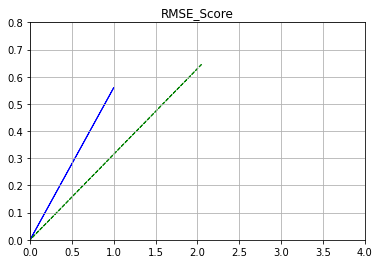

In [42]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.56,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.63,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.8])
ax.set_xlim([0,4])
plt.grid()
plt.title('RMSE_Score')

plt1.show()

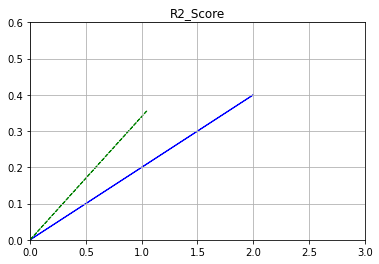

In [43]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,2,0.40,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,1,0.34,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('R2_Score')

plt1.show()

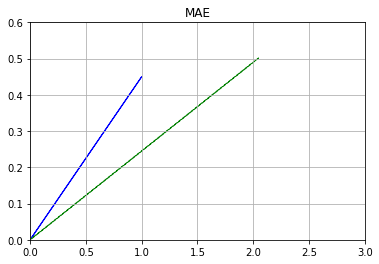

In [44]:
import matplotlib.pyplot as plt1
ax=plt1.axes()
color1= 'green'
color2= 'blue'
ax.arrow(0,0,1,0.45,head_width=0.00,head_length=0,fc=color2,ec=color2)
ax.arrow(0,0,2,0.49,head_width=0.00,head_length=0.05,fc=color1,ec=color1,linestyle='--')
ax.set_ylim([0,0.6])
ax.set_xlim([0,3])
plt.grid()
plt.title('MAE')

plt1.show()